# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Rebecca Cohen </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon

In [4]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
df.loc[(df["Latitude"]<0), 'Hemisferio'] = 'Sul'
df.loc[(df["Latitude"]>0), 'Hemisferio'] = 'Norte'

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [25]:
faixa = np.arange(5.5,8.5,0.1)

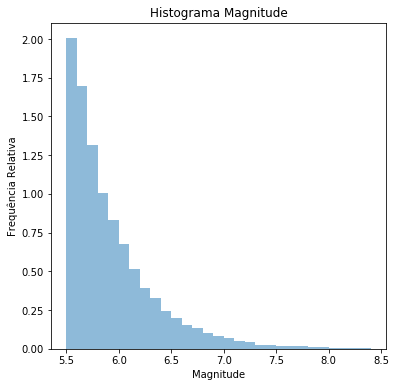

In [26]:
plot=df.Magnitude.plot.hist(bins=faixa, title='Histograma Magnitude', figsize=(6,6), normed=1, alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('Magnitude')
plt.show()

É possível observar no histograma que quanto maior a magnitude do terremoto, menor a sua frequência.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [71]:
loc = 5.5
scale = df.Magnitude.mean()-loc
print (loc)
print (scale)

5.5
0.38253075346000287


O loc é o Xo (5,5) e o Scale é média menos o loc (0,38).

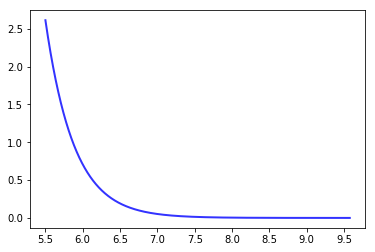

In [72]:
x=sorted(expon.rvs(size=len(df.Magnitude), loc=loc, scale=scale))
plt.plot(x, expon.pdf(x, loc=loc, scale=scale), lw=2, alpha=0.8, color="blue")

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

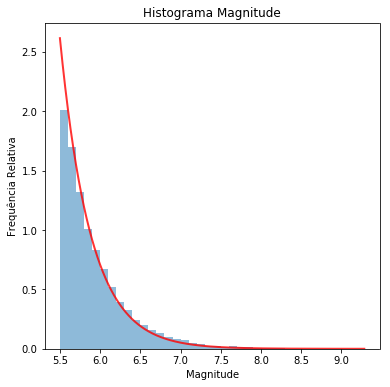

In [75]:
plot=df.Magnitude.plot.hist(bins=faixa, title='Histograma Magnitude', figsize=(6,6), normed=1, alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('Magnitude')
x=sorted(expon.rvs(size=len(df.Magnitude), loc=loc, scale=scale))
plt.plot(x, expon.pdf(x, loc=loc, scale=scale), lw=2, alpha=0.8, color="red")
plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [38]:
print('Tabela Cruzada')
ct=pd.crosstab(df.Hemisferio, df.Type, margins=True, rownames=['Hemisfério'], colnames=['Type'],normalize=True)*100
ct

Tabela Cruzada


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,44.714023,0.008543,0.627910,0.000000,45.350476
Sul,54.517107,0.008543,0.119602,0.004271,54.649524
All,99.231131,0.017086,0.747512,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [40]:
ct.Earthquake[0]

44.714023322369826

Explique o seu raciocínio

A tabela mostra a porcentagem de ocorrer os fenômenos nos diferentes hemisférios. Como foi pedido a probabilidade de um terremoto no norte, já está mostrado na tabela.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [44]:
probNe = ct['Nuclear Explosion'][0]/ct.All[0]*100
print (probNe)

1.38457191297


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

A probabilidade de ter sido Nuclear Explosion é 1,38%.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

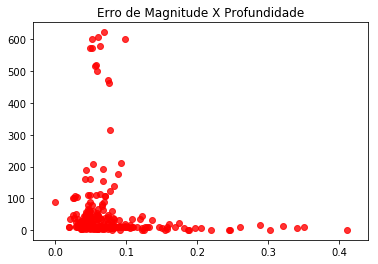

In [49]:
plt.scatter(df['Magnitude Error'], df.Depth, c='red', alpha=0.8)
plt.title('Erro de Magnitude X Profundidade')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [50]:
df['Magnitude Error'].corr(df.Depth)

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

O valor da correlação é a "dispersão" dos pontos no gráfico. A correlação varia de -1 a +1. Se o valor for 1, quer dizer que os pontos estão todos alinhas em uma linha reta. Quanto mais distante de 1 estiver, os pontos estão mais dispersos no gráfico. O sinal de negativo indica que a linha reta estaria voltada "decrescente".
O coeficiente -0,07, muito perto de 0, significa que os pontos estão tão dispersos que eles não possuem uma associação linear.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

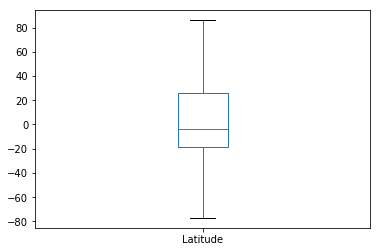

In [54]:
df.Latitude.plot.box( )

O valor mínimo seria em torno de -80 e o máximo em torno de 80. Entre 25% e 75% dos valores estão entre -20 e 20, com a mediana por volta de 5.

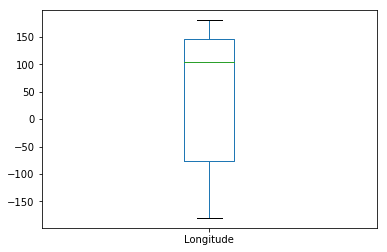

In [55]:
df.Longitude.plot.box( )

O valor mínimo seria em torno de -175 e o máximo em torno de 175. Entre 25% e 75% dos valores estão entre -75 e 140, com a mediana por volta de 100.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [56]:
mb = df[df["Magnitude Type"]=="MB"]

In [59]:
NE = mb[mb.Type=="Nuclear Explosion"]

In [63]:
porc = (NE.Hemisferio.value_counts(sort=False, normalize=True)*100)
print (porc)

Norte    82.822086
Sul      17.177914
Name: Hemisferio, dtype: float64


É mais provável que tenha sido no Norte, com 82,82% de chance.